In [1]:
import numpy as np # linear algebra
import pandas as pd

In [35]:
df = pd.read_csv('dataset2-lemma.csv')
df.head()

,id,tweet,text_processed,class
0,"1,48236E+18",Fabin Sanabria no era el que por lambonearle a...,fabin sanabrio lambonearle presidente santo as...,2
1,"1,48236E+18",la dualidad de una mujer de querer coquetearle...,dualidad mujer querer coquetear él mundo vez q...,2
2,"1,48236E+18",No precisaron la edad de cuando se hizo cura ...,precisar edad hacer cura l decir lola varios n...,2
3,"1,48236E+18",Esta hija de un montonero y mujer de un camale...,hija montonero mujer camalar peronacho penoso ...,2
4,"1,48236E+18",Una mujer abierta a comprender y a tr...,mujer abierto comprender trabajar necesidad di...,0


In [36]:
df =df.dropna()
df = df.drop_duplicates()

In [31]:
import spacy
import es_core_news_sm
nlp = spacy.load('es_core_news_sm')

def lemmatizer(text):  
  doc = nlp(text)
  return ' '.join([word.lemma_ for word in doc])

df['text_processed'] = df['text_processed'].apply(lambda x: lemmatizer(x))

In [37]:
df.head()

,id,tweet,text_processed,class
0,"1,48236E+18",Fabin Sanabria no era el que por lambonearle a...,fabin sanabrio lambonearle presidente santo as...,2
1,"1,48236E+18",la dualidad de una mujer de querer coquetearle...,dualidad mujer querer coquetear él mundo vez q...,2
2,"1,48236E+18",No precisaron la edad de cuando se hizo cura ...,precisar edad hacer cura l decir lola varios n...,2
3,"1,48236E+18",Esta hija de un montonero y mujer de un camale...,hija montonero mujer camalar peronacho penoso ...,2
4,"1,48236E+18",Una mujer abierta a comprender y a tr...,mujer abierto comprender trabajar necesidad di...,0


In [38]:
df.dtypes

id                object
tweet             object
text_processed    object
class              int64
dtype: object

In [39]:
species_counts = df.groupby('class')['tweet'].count()
print(species_counts)

class
0     98
1    207
2    158
Name: tweet, dtype: int64


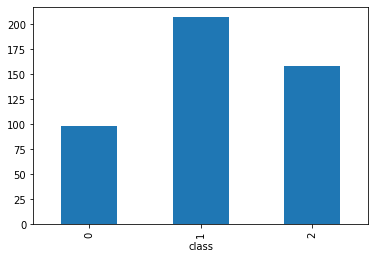

In [40]:
%matplotlib inline
# Creaemos una gráfica de barras
species_counts.plot(kind='bar');

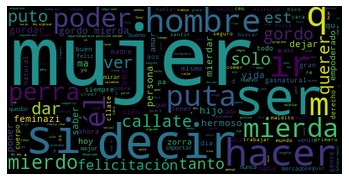

In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join the different processed titles together.
long_string = ','.join(list(df['text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="black", max_words=5000, contour_width=3, contour_color='summer')
# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
plt.imshow(wordcloud, interpolation='lanczos')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

C:\Users\adri_\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


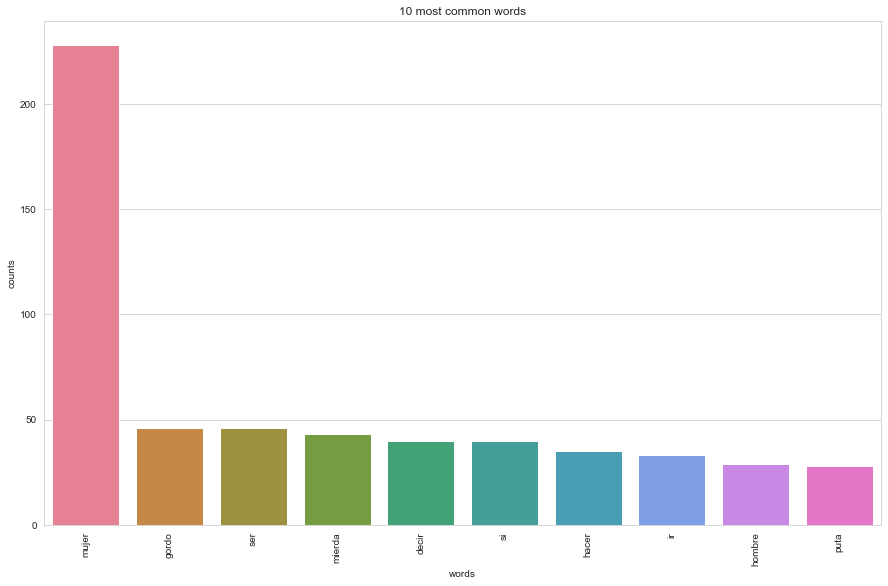

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords

sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()


# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words=stopwords.words('spanish'))
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df['text_processed'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)
#print(count_data)


<AxesSubplot:>

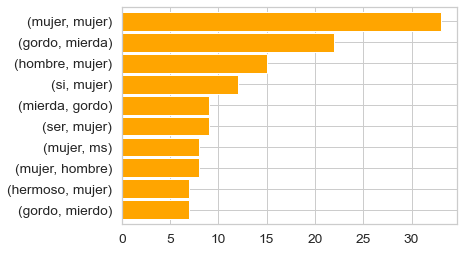

In [43]:
import nltk
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from nltk.tokenize import word_tokenize

words = ' '.join(df['text_processed'].tolist())
skipgrams = nltk.skipgrams(word_tokenize(words), 2, 2)
skipgrams_series = (pd.Series(skipgrams).value_counts())[:10]
skipgrams_series.sort_values().plot.barh(color='orange', width=.9, figsize=(6, 4))

In [44]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

 
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))



count_data = count_vectorizer.fit_transform(df['text_processed'])


number_topics = 10
number_words = 5
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
mujer gordo mierda poder ser

Topic #1:
mujer ver gordo mierdo decir

Topic #2:
decir mujer perra hacer ir

Topic #3:
mujer ir mierda gordo ser

Topic #4:
mujer mierdo vida derecho si

Topic #5:
mujer hermoso amar ms ser

Topic #6:
mujer mierda gordo dar ser

Topic #7:
mujer callate ir ser perra

Topic #8:
mujer aion hacer persona mercado

Topic #9:
mujer hombre si est felicitación


In [34]:
df.to_csv('dataset2-lemma.csv', index=False, header=True, encoding="utf-8")
df.count()

id                463
tweet             463
text_processed    463
class             463
dtype: int64